In [1]:
from utilities import *

from os.path import expanduser

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC

In [2]:
path = expanduser('~/data/Women Dresses Reviews Dataset .csv')
data = pd.read_csv(path)

In [3]:
data.sample(3)

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
3997,3997,54,General,Bottoms,Pants,1066,Perfect pants,I paid full price for these gladly (the olive ...,0,5,1
18149,18149,65,General,Tops,Knits,854,Casual type dressy,This blouse is perfect for semi dressy occasio...,0,4,1
7253,7253,42,General,Bottoms,Pants,1042,Beauttiful fabric,I love these pants. the material is so nice an...,0,4,1


In [4]:
data['rating'].value_counts()

rating
5    13131
4     5077
3     2871
2     1565
1      842
Name: count, dtype: int64

In [5]:
data[data['review_text'].isnull()][['review_text', 'rating']].sum()

review_text       0
rating         3828
dtype: object

In [6]:
data['review_text'] = data['review_text'].fillna('')

data['cleaned_review'] = data['review_text']\
    .apply(lambda x: tokenize(x))\
    .apply(lambda x: create_stemwords(x))

# sklearn throws an error if the data isn't string
data['cleaned_review_JOINED'] = data['cleaned_review'].apply(lambda x: ' '.join(x))

In [7]:
X = data['cleaned_review_JOINED']
y = data['rating']

# look at X where y is null
X[y.isnull()]

Series([], Name: cleaned_review_JOINED, dtype: object)

In [8]:
# # drop rows where y is null
# X = X.dropna()
# y = y.dropna()

X_train, X_test, y_train, y_test  = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
# encode target labels with value between 0 and n_classes-1
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [10]:
tfidf_params = {}
nb_params = {}

In [11]:
nb_pipeline, nb_preds = naive_bayes_pipeline(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    sampling_method='adasyn'
)

print(classification_report(y_test, nb_preds))

              precision    recall  f1-score   support

           0       0.29      0.40      0.34       168
           1       0.33      0.17      0.22       313
           2       0.34      0.44      0.38       574
           3       0.34      0.50      0.40      1016
           4       0.83      0.64      0.73      2627

    accuracy                           0.55      4698
   macro avg       0.43      0.43      0.42      4698
weighted avg       0.61      0.55      0.57      4698


In [16]:
lr_params = {'C': 1.0, 'penalty': 'l1', 'max_iter': 1000}

In [17]:
log_rg_pipeline, log_rg_preds = logistic_regression_pipeline(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    lr_params=lr_params
)

ValueError: could not convert string to float: 'tri dress store look frumpi ruch flatter fabric felt cheap think price plenti option dress wow look lb fit fine'

In [81]:
from yellowbrick.classifier import ROCAUC

# Instantiate the visualizer with the classification model
# Create and display ROC AUC plot without re-fitting
visualizer = ROCAUC(nb_pipeline, classes=np.unique(y_train))
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

/Users/witcheverly/opt/anaconda3/envs/mle/lib/python3.11/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


YellowbrickAttributeError: neither visualizer 'ROCAUC' nor wrapped estimator 'Pipeline' have attribute 'target_type_'

/Users/witcheverly/opt/anaconda3/envs/mle/lib/python3.11/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


0.5600255427841635

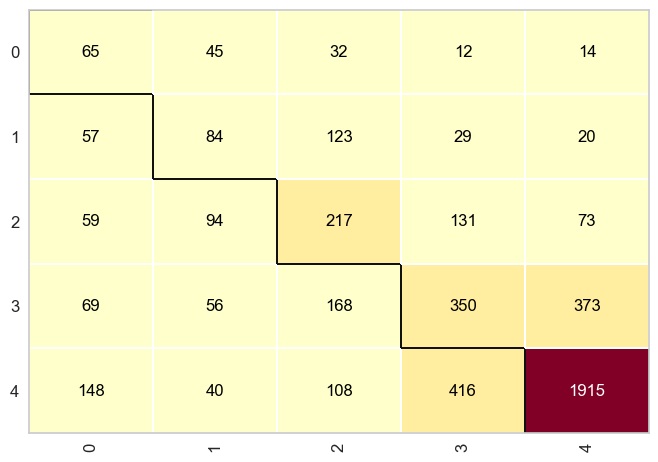

In [68]:
from yellowbrick.classifier import ConfusionMatrix

# create the ConfusionMatrix object
cm = ConfusionMatrix(nb_pipeline, classes=nb_pipeline.classes_)# Use the model to make predictions on the test data

cm.score(X_test, y_test)

In [67]:
visualizer = ROCAUC(nb_pipeline, classes=nb_pipeline.classes_, is_fitted=True)
visualizer.score(X_test, y_test)
visualizer.poof()

/Users/witcheverly/opt/anaconda3/envs/mle/lib/python3.11/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


YellowbrickAttributeError: neither visualizer 'ROCAUC' nor wrapped estimator 'Pipeline' have attribute 'target_type_'

In [54]:
visualizer = ClassificationReport(nb_pipeline, classes=nb_pipeline.classes_, is_fitted=True)
visualizer.score_nb(X_test, y_test)


YellowbrickAttributeError: neither visualizer 'ClassificationReport' nor wrapped estimator 'Pipeline' have attribute 'score_nb'